Image segmentation using MLP (on the EPFL dataset)

In [2]:
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import numpy as np

import os

In [3]:
!git clone https://github.com/Shankar0x/Datasets.git imgs

Cloning into 'imgs'...
remote: Enumerating objects: 9538, done.
remote: Total 9538 (delta 0), reused 0 (delta 0), pack-reused 9538
Receiving objects: 100% (9538/9538), 149.08 MiB | 10.06 MiB/s, done.
Resolving deltas: 100% (2230/2230), done.
Updating files: 100% (9861/9861), done.


In [4]:
image_files_trainx = [os.path.join('imgs/Skin_Lesion_Dataset/trainx', f) for f in os.listdir('imgs/Skin_Lesion_Dataset/trainx')]
image_files_trainy = [os.path.join('imgs/Skin_Lesion_Dataset/trainy', f) for f in os.listdir('imgs/Skin_Lesion_Dataset/trainy')]

image_files_testx = [os.path.join('imgs/Skin_Lesion_Dataset/testx', f) for f in os.listdir('imgs/Skin_Lesion_Dataset/testx')]
image_files_testy = [os.path.join('imgs/Skin_Lesion_Dataset/testy', f) for f in os.listdir('imgs/Skin_Lesion_Dataset/testy')]

trainx = []
trainy = []

testx = []
testy = []

# Image is being resized to a small image to make training faster.

IMAGE_DIM = 32

for path in image_files_trainx:
  img = tf.image.resize(cv2.imread(path), (IMAGE_DIM, IMAGE_DIM)) / 255.0
  trainx.append(img)

for path in image_files_trainy:
  img = tf.image.resize(cv2.imread(path), (IMAGE_DIM, IMAGE_DIM)) / 255.0
  trainy.append(img)

for path in image_files_testx:
  img = tf.image.resize(cv2.imread(path), (IMAGE_DIM, IMAGE_DIM)) / 255.0
  testx.append(img)

for path in image_files_testy:
  img = tf.image.resize(cv2.imread(path), (IMAGE_DIM, IMAGE_DIM)) / 255.0
  testy.append(img)

image_shape_input = trainx[0].shape
image_shape_output = trainy[0].shape

In [5]:
print('image shape input : ', image_shape_input)
print('image shape output : ', image_shape_output)

image shape input :  (32, 32, 3)
image shape output :  (32, 32, 3)


trainx


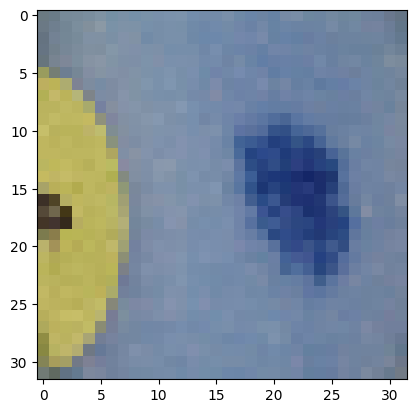

trainy


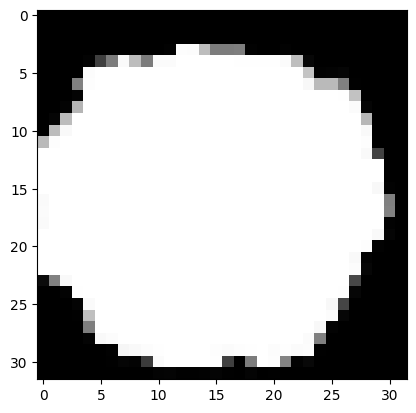

testx


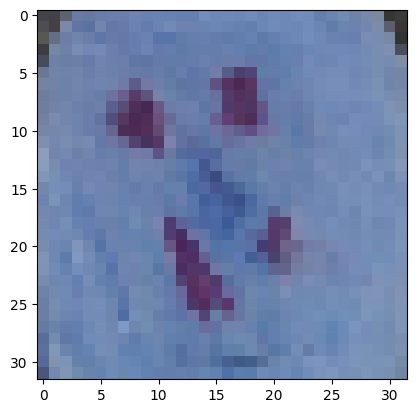

testy


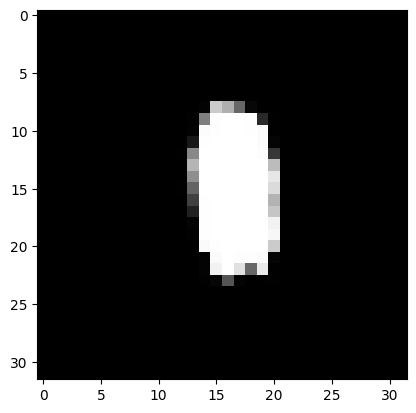

In [6]:
# Print image from each of these foldes
print('trainx')
plt.imshow(trainx[0])
plt.show()

print('trainy')
plt.imshow(trainy[0])
plt.show()

print('testx')
plt.imshow(testx[0])
plt.show()

print('testy')
plt.imshow(testy[0])
plt.show()

Training and testing the mode.

Goal is to train the model on individual pixels (1x1x3) using MLP.

In [7]:
# Input : 1x1x3
# Output : 1x1x3
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1, 1, 3)),
    tf.keras.layers.Conv2D(64, (1, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(3, (1, 1), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 1, 64)          256       
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 3)           195       
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Reshape entire trainx and trainy into array where each elem is 1x1x3
trainx_flat = np.array(trainx).reshape(-1, 1, 1, 3)
print('overall trainx shape : ', trainx_flat.shape)
print('shape of each image : ', trainx_flat[0].shape)

trainy_flat = np.array(trainy).reshape(-1, 1, 1, 3)

overall trainx shape :  (2048000, 1, 1, 3)
shape of each image :  (1, 1, 3)


In [9]:
model.fit(trainx_flat, trainy_flat)

64000/64000 [==============================] - 146s 2ms/step - loss: 0.4648 - accuracy: 0.3334


In [10]:
testx_flat = np.array(testx).reshape(-1, 1, 1, 3)
testy_flat = np.array(testy).reshape(-1, 1, 1, 3)

loss, accuracy = model.evaluate(testx_flat, testy_flat)

print("Model Accuracy: {}".format(accuracy * 100))


19200/19200 [==============================] - 34s 2ms/step - loss: 0.5275 - accuracy: 0.1595
Model Accuracy: 15.950846672058105


Visualization

In [11]:
viz_test_image = testx_flat[:32 * 32]
predicted_output_image = model.predict(viz_test_image)

32/32 [==============================] - 0s 1ms/step


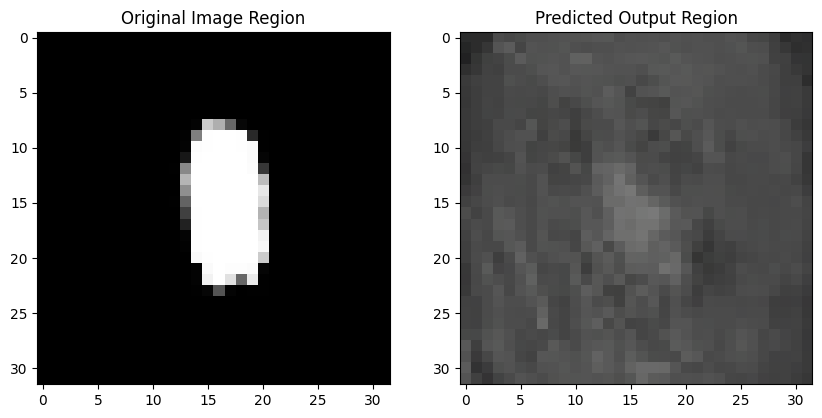

In [12]:
predicted_output_image = predicted_output_image.reshape(32, 32, 3)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.array(testy_flat[:32*32]).reshape(32, 32, 3))
plt.title('Original Image Region')

# Predicted image
plt.subplot(1, 2, 2)
plt.imshow(predicted_output_image)
plt.title('Predicted Output Region')

plt.show()

Changing model to a MLP based one

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1, 1, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1, 1, 256)         1024      
                                                                 
 dense_9 (Dense)             (None, 1, 1, 128)         32896     
                                                                 
 dense_10 (Dense)            (None, 1, 1, 64)          8256      
                                                                 
 dense_11 (Dense)            (None, 1, 1, 1)           65        
                                                                 
Total params: 42,241
Trainable params: 42,241
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Modification of trainy to make it 1x1x1

modified_trainy = []
for img in trainy_flat:
  modified_trainy.append(img[0][0][0])

print(trainx_flat.shape, trainy_flat.shape)

modified_trainy = np.array(modified_trainy).reshape(-1, 1, 1, 1)

print(trainx_flat.shape, modified_trainy.shape)

model.fit(trainx_flat, modified_trainy)

(2048000, 1, 1, 3) (2048000, 1, 1, 3)
(2048000, 1, 1, 3) (2048000, 1, 1, 1)
64000/64000 [==============================] - 215s 3ms/step - loss: 0.4627 - accuracy: 0.7657


In [30]:
viz_test_image = testx_flat[:32 * 32]
predicted_output_image = model.predict(viz_test_image)

32/32 [==============================] - 0s 2ms/step


[[[0.22649717]
  [0.22975102]
  [0.18916483]
  ...
  [0.18660632]
  [0.22915202]
  [0.23547354]]

 [[0.20106089]
  [0.2344567 ]
  [0.24851272]
  ...
  [0.23977534]
  [0.20014907]
  [0.2521379 ]]

 [[0.17943592]
  [0.22819953]
  [0.30006453]
  ...
  [0.28934556]
  [0.22347924]
  [0.23254706]]

 ...

 [[0.37313506]
  [0.25628915]
  [0.32564655]
  ...
  [0.2909805 ]
  [0.2974443 ]
  [0.25990316]]

 [[0.42842534]
  [0.22100285]
  [0.26360843]
  ...
  [0.28454152]
  [0.27566114]
  [0.25350055]]

 [[0.38246548]
  [0.29358417]
  [0.22464028]
  ...
  [0.28777632]
  [0.26586923]
  [0.23363914]]]


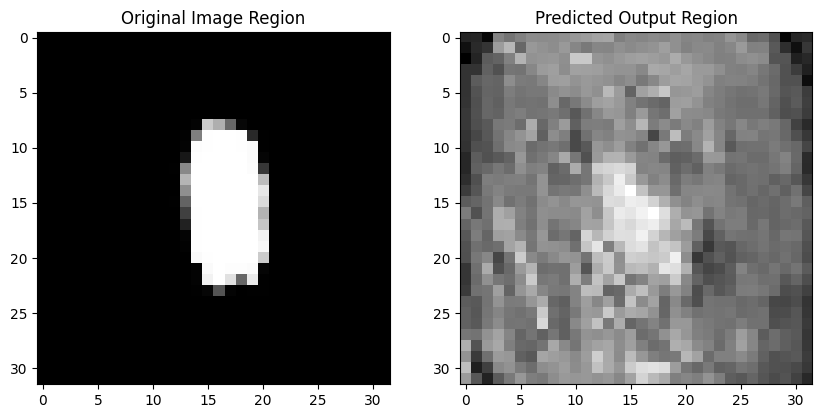

In [36]:
predicted_output_image = predicted_output_image.reshape(32, 32, 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.array(testy_flat[:32*32]).reshape(32, 32, 3))
plt.title('Original Image Region')

print(predicted_output_image)
# Predicted image
plt.subplot(1, 2, 2)
plt.imshow(predicted_output_image, cmap='gray')
plt.title('Predicted Output Region')

plt.show()

In [38]:
testx_flat = np.array(testx).reshape(-1, 1, 1, 3)

modified_testy = []
for img in testy_flat:
  modified_testy.append(img[0][0][0])

modified_testy = np.array(modified_testy).reshape(-1, 1, 1, 1)

loss, accuracy = model.evaluate(testx_flat, modified_testy)

print("Model Accuracy: {}".format(accuracy * 100))


19200/19200 [==============================] - 41s 2ms/step - loss: 0.5278 - accuracy: 0.7150
Model Accuracy: 71.50406837463379
